In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from pprint import pprint

def find_extremum(f, x_values, s, t):
    # print(x_values)
    # print(x_values[s], x_values[t])
    arg_max = argrelextrema(f(x_values[s:t]), np.greater)
    arg_max = np.array(arg_max[0])

    arg_min = argrelextrema(f(x_values[s:t]), np.less)
    arg_min = np.array(arg_min[0])

    if len(arg_min) == 0 and len(arg_max) == 0:
        res = s if abs(f(x_values[s])) > abs(f(x_values[t])) else t

    else:
        arg = s+ (arg_min if len(arg_min) else arg_max)
        if len(arg) > 0:
            b_arg = arg[0]
            # print(arg, x_values[arg], f(x_values[arg]))
            for i in range(1,len(arg)):
                if abs(f(x_values[arg[i]])) > abs(f(x_values[b_arg])):
                    b_arg = arg[i]
            arg = b_arg
        else:
            arg = arg[0]

        if abs(f(x_values[s])) - abs(f(x_values[arg])) > 0:
            res = s
        elif abs(f(x_values[t])) - abs(f(x_values[arg])) > 0:
            res = t
        else:
            res =  arg

    return res


def find_all_extrema(f, N, poly, a, b, show_steps=False):
    x = np.linspace(a, b, 10000)
    error_function = lambda xi: poly(xi) - f(xi)

    roots = np.zeros(N + 1, dtype=int)
    j = 0
    for i in range(len(x)-1):
        if np.sign(error_function(x[i])) != np.sign(error_function(x[i+1])):
            if j >= len(roots):
                # print(":(((", i, x[i])
                break
            roots[j] = i
            j +=1
            # print(i, x[i])
    intervals = np.insert(roots, 0, 0)
    intervals = np.insert(intervals, len(intervals), len(x) -1)
    # print(roots)
    # print(x[roots])
    extrema = [None] * (N + 2)

    for i in range(len(intervals) -1):
        extr = find_extremum(error_function, x, intervals[i], intervals[i+1])
        # print(extr, x[extr])
        extrema[i] = extr

    extrema = np.array(extrema)

    if show_steps:
        plt.plot(x, error_function(x), label = 'error func')
        plt.scatter(x[intervals], error_function(x[intervals]), label="intervals")
        plt.scatter(x[extrema], error_function(x[extrema]), label="extrema")
        plt.legend()
        plt.show()

    # print(extrema, len(extrema))

    return x[extrema]

def exchange(f, N, poly, a, b, show_steps):
    new_x_values = find_all_extrema(f, N,poly, a, b, show_steps)
    errors = poly(new_x_values) - f(new_x_values)
    e_min, e_max = np.min(np.abs(errors)), np.max(np.abs(errors))
    return new_x_values, e_min, e_max

def solve_system(x_values, y_values):
    size = len(x_values)
    powers = np.arange(size-1)
    A = np.zeros((size, size))
    for i in range(size):
        A[i, :size-1] = x_values[i] ** powers

    a = np.ones(size)
    a[::2] = 1
    a[1::2] = -1
    A[:, size-1] = a

    # pprint(A)
    solution = np.linalg.solve(A, y_values)

    return np.poly1d(solution[:size-1][::-1]), solution[size-1]

def remez(f, N, a, b, tolerance=1e-6, plot_steps=False):
    x_values = np.linspace(a, b, N+2)
    y_values = f(x_values)

    i=0

    last_E = float('inf')

    if plot_steps:
        x = np.linspace(a, b, 1000)
        plt.plot(x, f(x), label='f(x)')
        plt.scatter(x_values, f(x_values), label = 'nodes')

        plt.legend()
        plt.show()

    while True:
        print("i: {}".format(i))
        poly, error = solve_system(x_values, y_values)

        x_values, e_min, e_max = exchange(f, N, poly, a, b, plot_steps)
        y_values = f(x_values)

        i+=1
        print("E_M / E_m = {}\nError = {}\n".format(e_max / e_min, error))
        if plot_steps:
            x = np.linspace(a, b, 1000)
            plt.plot(x, f(x), label='f(x)')
            plt.scatter(x_values, poly(x_values), label = 'nodes')
            plt.plot(x, poly(x), label='approx')

            plt.legend()
            plt.show()

        if (e_max / e_min) <= 1 + tolerance:
            break

        if (e_max / e_min)  >= last_E:
            break

        last_E = e_max/e_min


    x = np.linspace(a, b, 1000)
    plt.plot(x, f(x))
    plt.plot(x, poly(x))

    plt.show()
    print(poly)

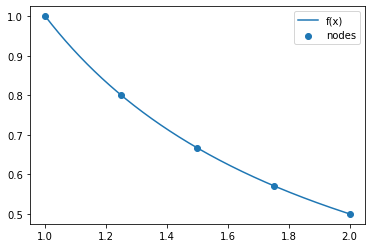

i: 0


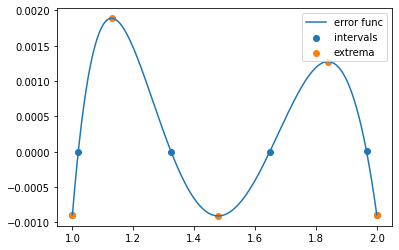

E_M / E_m = 2.11289176015774
Error = 0.0008928571428571258



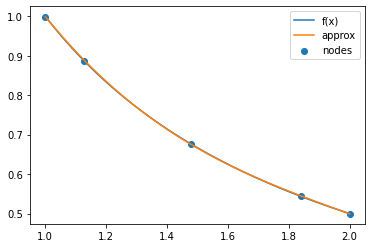

i: 1


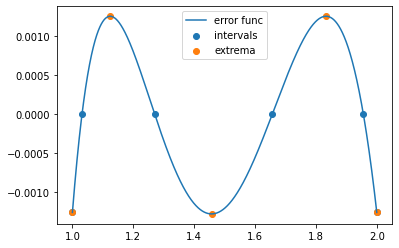

E_M / E_m = 1.0152570280690303
Error = 0.0012567765336545674



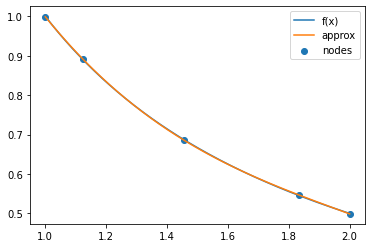

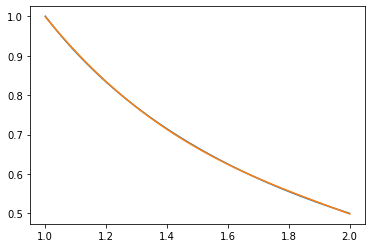

         3         2
-0.2355 x + 1.393 x - 3.03 x + 2.872


In [198]:
f = lambda x: 1 / x
remez(f, 3, 1, 2, tolerance=0.05, plot_steps=True)

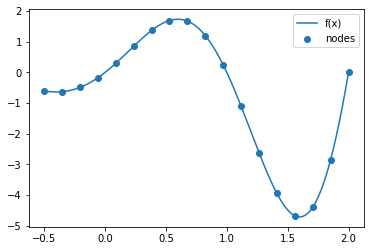

i: 0


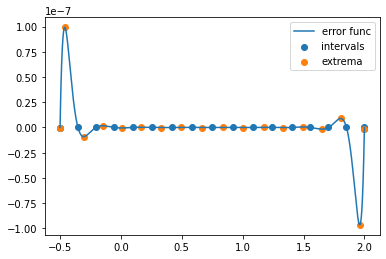

E_M / E_m = 1662.6087367779437
Error = 5.97428526504049e-11



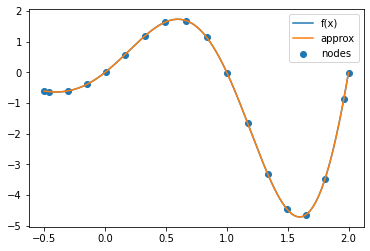

i: 1


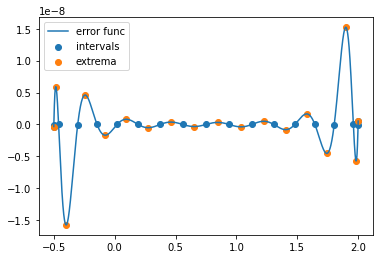

E_M / E_m = 49.533007644434996
Error = 3.1752267384846877e-10



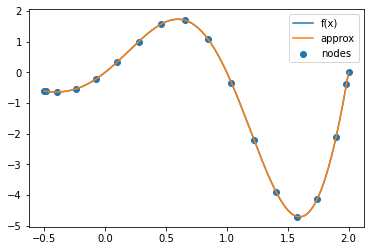

i: 2


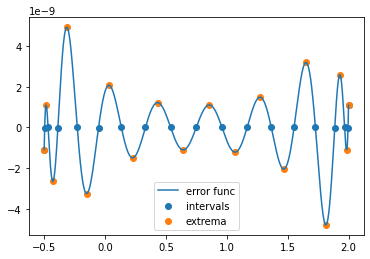

E_M / E_m = 4.505707960944375
Error = 1.091894478419489e-09



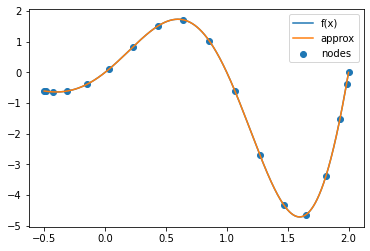

i: 3


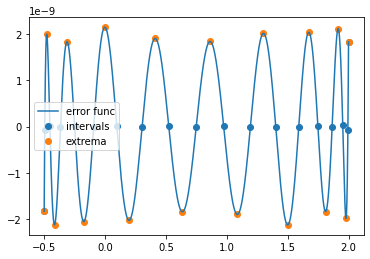

E_M / E_m = 1.1716307669899018
Error = 1.8276823837369128e-09



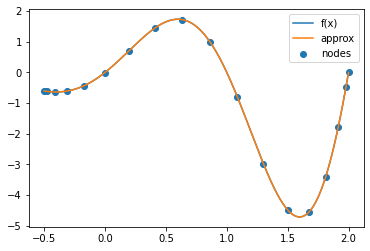

i: 4


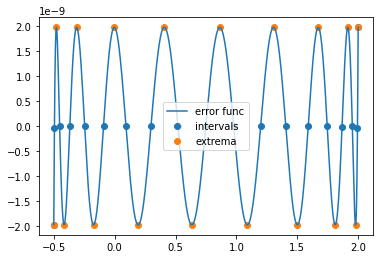

E_M / E_m = 1.0016574803593368
Error = 1.9699660564686255e-09



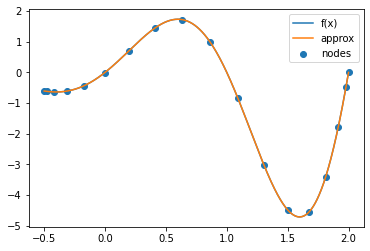

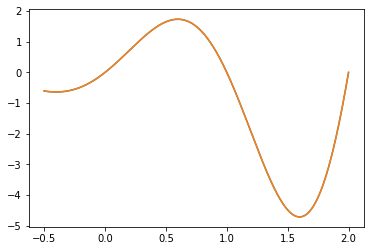

           16             15             14             13
-1.05e-05 x  + 0.0001656 x  - 0.0007517 x  + 0.0005043 x 
              12           11            10          9          8
 + 0.0007267 x  + 0.01248 x  + 0.002964 x  - 0.1188 x - 0.2166 x
          7         6          5         4         3         2
 + 0.465 x + 1.715 x + 0.0972 x - 4.644 x - 3.597 x + 3.142 x + 3.142 x + 1.968e-09


In [199]:
f = lambda x: np.exp(x) * np.sin(np.pi * x)
remez(f, 16, -0.5, 2, tolerance=0.05, plot_steps=True)

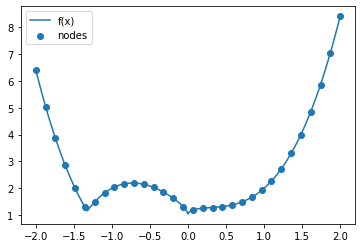

i: 0


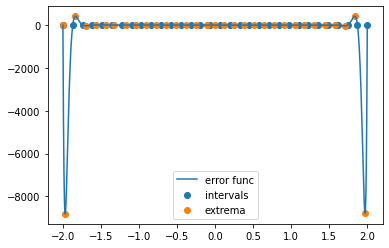

E_M / E_m = 1652003534.278146
Error = -5.146204750376077e-06



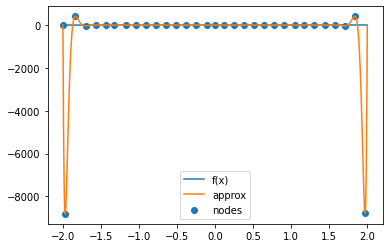

i: 1


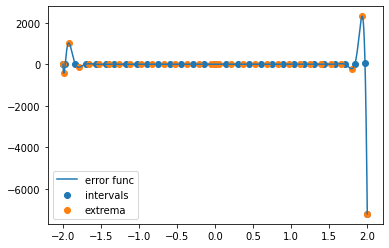

E_M / E_m = 151097.56603402024
Error = -0.04771800131934548



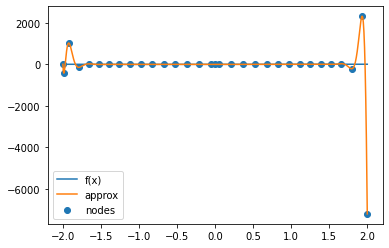

i: 2


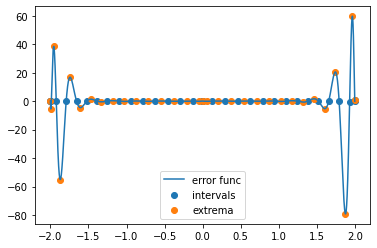

E_M / E_m = 1010.1949449374468
Error = -0.07841500852103955



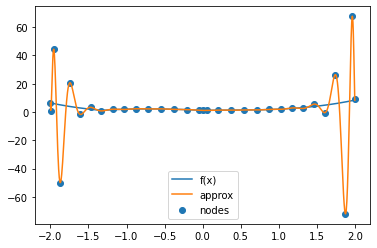

i: 3


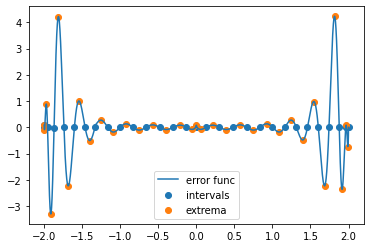

E_M / E_m = 52.7420884315761
Error = -0.08025446049227816



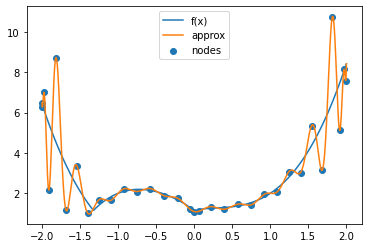

i: 4


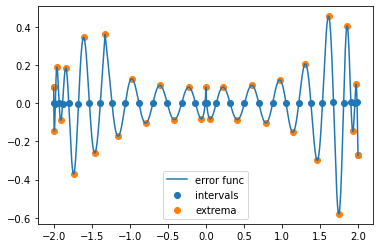

E_M / E_m = 7.04981399075428
Error = -0.08230411880596497



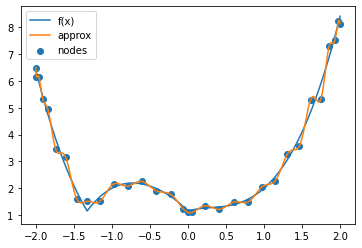

i: 5


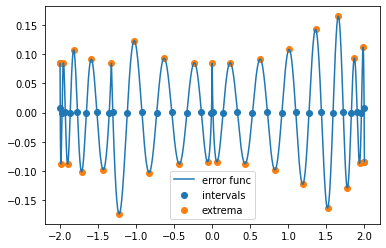

E_M / E_m = 2.06032346030096
Error = -0.08419096340494787



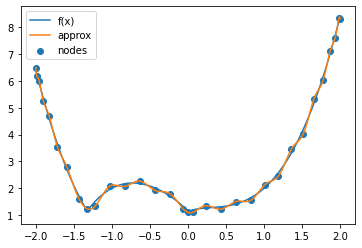

i: 6


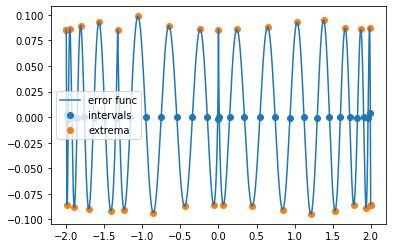

E_M / E_m = 1.1545107062904274
Error = -0.08548445424756335



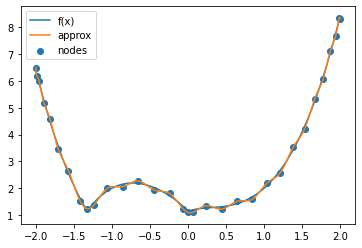

i: 7


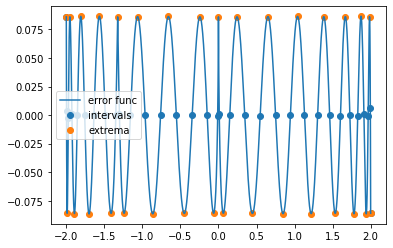

E_M / E_m = 1.006785162332546
Error = -0.08595916140848123



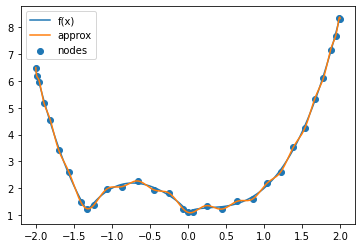

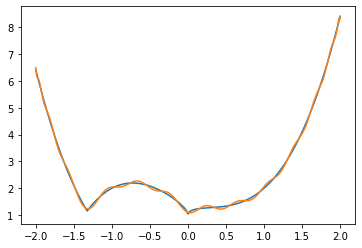

         30           29          28          27         26         25
0.01935 x  - 0.01128 x  - 0.6017 x  + 0.3008 x  + 8.447 x  - 3.555 x 
          24         23         22         21        20         19
 - 70.75 x  + 24.53 x  + 393.6 x  - 109.5 x  - 1532 x  + 331.3 x 
         18         17        16         15            14         13
 + 4283 x  - 692.3 x  - 8677 x  + 999.8 x  + 1.27e+04 x  - 982.6 x 
              12         11        10         9        8         7
 - 1.324e+04 x  + 636.2 x  + 9564 x  - 256.6 x - 4572 x + 58.69 x
         6         5         4         3         2
 + 1349 x - 6.427 x - 219.7 x + 1.236 x + 17.21 x - 1.001 x + 1.1


In [228]:
f = lambda x : np.sqrt(np.abs(x)) + np.abs(x ** 3 - x + 1)
remez(f, 30, -2, 2, tolerance=0.05, plot_steps=True)

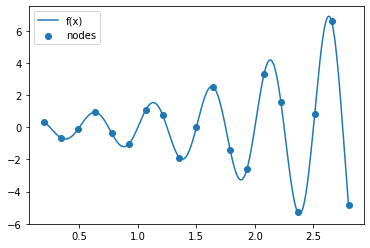

i: 0


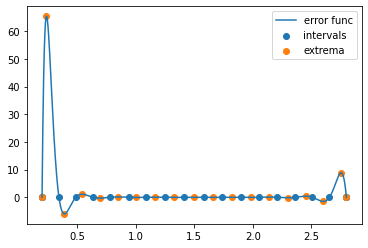

E_M / E_m = 2405.5262732268375
Error = 0.0286260336940097



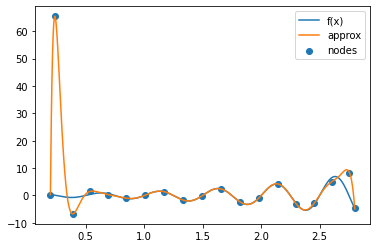

i: 1


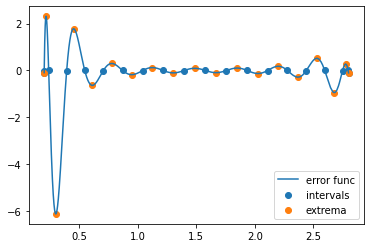

E_M / E_m = 66.40930175962579
Error = 0.09207937435880849



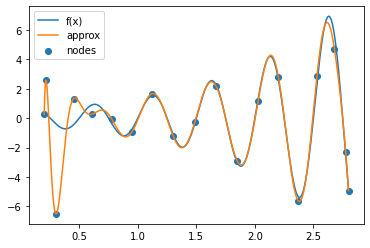

i: 2


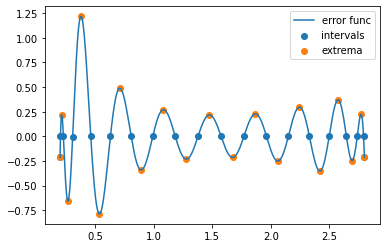

E_M / E_m = 5.68639281983301
Error = 0.21462560723670357



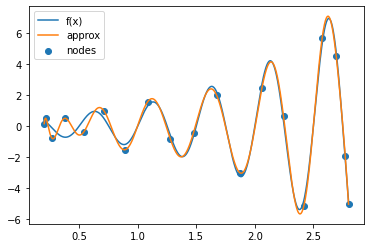

i: 3


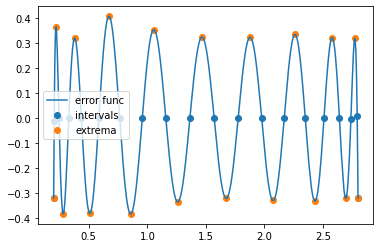

E_M / E_m = 1.2765722712345329
Error = 0.3209165716506037



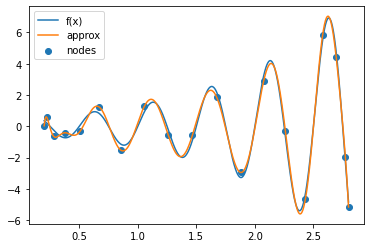

i: 4


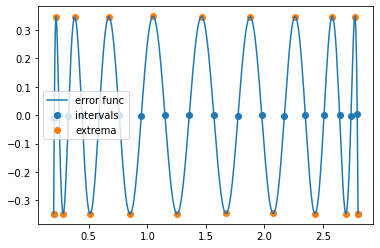

E_M / E_m = 1.0073208615790807
Error = 0.346387731582005



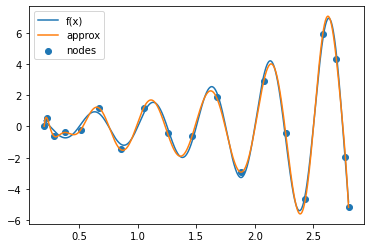

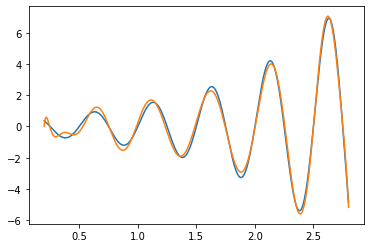

       17             16             15             14             13
391.8 x  - 1.024e+04 x  + 1.226e+05 x  - 8.914e+05 x  + 4.399e+06 x 
              12             11             10             9
 - 1.559e+07 x  + 4.102e+07 x  - 8.155e+07 x  + 1.236e+08 x
              8             7             6            5             4
 - 1.433e+08 x + 1.266e+08 x - 8.447e+07 x + 4.19e+07 x - 1.508e+07 x
              3             2
 + 3.797e+06 x - 6.289e+05 x + 6.111e+04 x - 2622


In [229]:
f = lambda x : (np.exp(x) * np.cos(2 * np.pi * x) * np.sin(2 * np.pi * x))
remez(f, 17, 0.2, 2.8, tolerance=0.05, plot_steps=True)

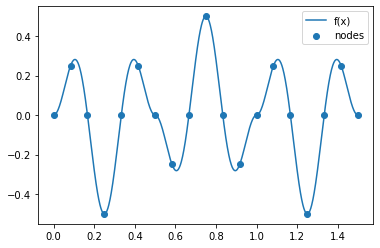

i: 0


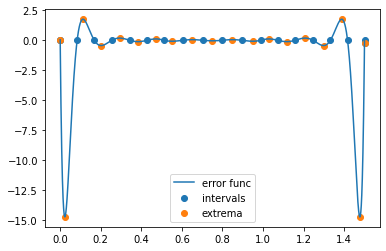

E_M / E_m = 324.6603202152291
Error = -0.04529704693933158



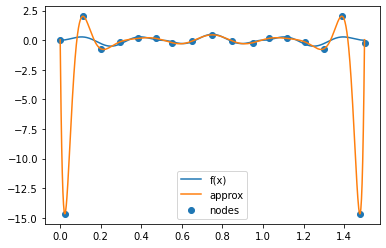

i: 1


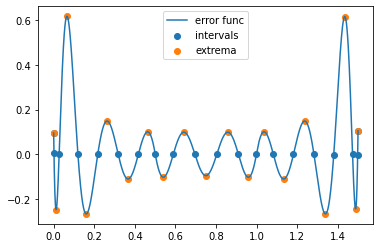

E_M / E_m = 6.4756560727967205
Error = -0.09536487519030665



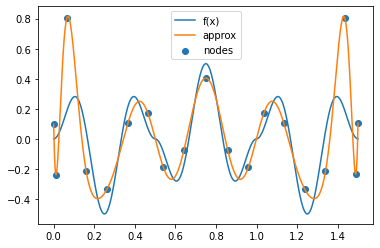

i: 2


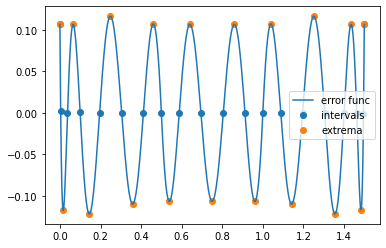

E_M / E_m = 1.1428444655364778
Error = -0.10648652743302445



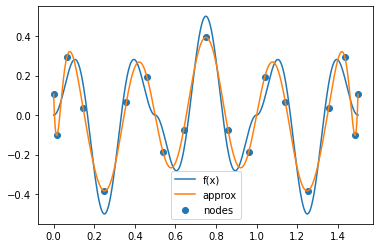

i: 3


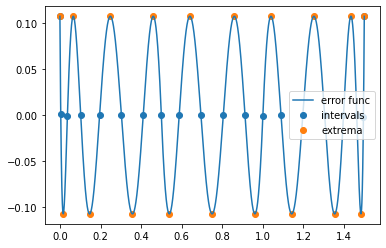

E_M / E_m = 1.0010456234367802
Error = -0.10736882680349566



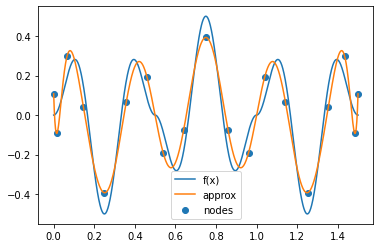

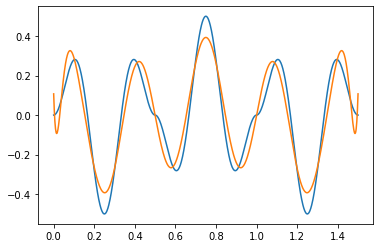

       17             16             15            14             13
9.654 x  + 2.395e+05 x  - 2.875e+06 x  + 1.56e+07 x  - 5.057e+07 x 
              12             11             10             9
 + 1.091e+08 x  - 1.652e+08 x  + 1.805e+08 x  - 1.439e+08 x
            8             7             6             5             4
 + 8.4e+07 x - 3.567e+07 x + 1.088e+07 x - 2.338e+06 x + 3.428e+05 x
             3        2
 - 3.22e+04 x + 1668 x - 32.19 x + 0.1074


In [197]:
f = lambda x : (np.cos(3 * np.pi * x) * np.sin(3 * np.pi * x)) * np.abs(np.sin(2 * np.pi * x))
remez(f, 17, 0, 1.5, tolerance=0.05, plot_steps=True)